In [1]:
from neuron import h, gui
import plotly
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
import pickle
import plotly
from scipy.optimize import leastsq
plt.rcParams['font.size']=15

--No graphics will be displayed.


In [2]:
!nrnivmodl

/home/mjy/anaconda3/envs/bilinear_network/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/mjy/project/bilinear_network/ganglion
Mod files: "./capump.mod" "./spike.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [3]:
h.load_file('mosinit.hoc')

	1 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	1 
loading: SmallSimple/CTT1209B/ctt1209b
	1 


1.0

In [4]:
def change_to_pas():
    for sec in h.allsec():
        #if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
# change_to_pas()

In [5]:
for sec in h.allsec():
    if sec != h.soma:
        sec.Ra = 500
        sec.cm = 0.5

In [6]:
modi_dend = [h.dend1[0], h.dend1[1], h.dend1[4], h.dend2[0], h.dend2[1], h.dend2[4]]
for sec in modi_dend:
    sec.L *= 4

In [7]:
input_list = [h.dend1[2], h.dend1[3], h.dend1[5], h.dend1[6], h.dend2[2], h.dend2[3], h.dend2[6], h.dend2[7], h.dend2[8]]
#input_list = [h.dend1[2], h.dend1[3], h.dend1[1], h.dend1[0], h.dend2[6], h.dend2[7], h.dend2[5], h.dend2[4], h.dend2[0]]

In [16]:
ic = h.IClamp[0]
ic.amp = 0

ic0 = h.IClamp(input_list[0](1))
ic0.amp = 0
ic0.delay = 400
ic0.dur = 0.1

ic1 = h.IClamp(input_list[1](1))
ic1.amp = 0
ic1.delay = 400
ic1.dur = 0.1

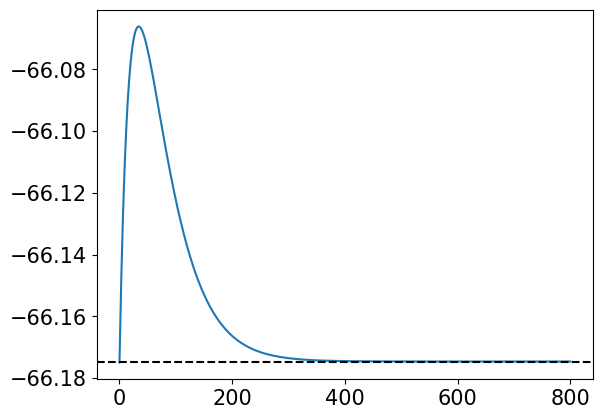

In [18]:
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
h.finitialize(-66.175)
h.continuerun(800)
plt.plot(t, v)
# plt.axhline(-66.175, ls='--', c='k')

In [39]:
for k in range(3):
    if k == 0:
        ic0.amp = 0.2
        ic1.amp = 0.2
        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(h.soma(0.5)._ref_v)   
        h.finitialize(-66.175)
        h.continuerun(800)
        v1 = np.array(v)
    
    elif k == 1:
        ic0.amp = 0.2
        ic1.amp = 0
        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(h.soma(0.5)._ref_v)   
        h.finitialize(-66.175)
        h.continuerun(800)
        v2 = np.array(v)

    else:
        ic0.amp = 0
        ic1.amp = 0.2
        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(h.soma(0.5)._ref_v)   
        h.finitialize(-66.175)
        h.continuerun(800)
        v3 = np.array(v)
tp = np.argmax(v2)
# kappa = (v2[tp] + v3[tp] - v1[tp] + 66.175) / ((v2[tp]+66.175) * (v3[tp]+66.175))
kappa = (np.max(v2) + np.max(v3) - np.max(v1) + 66.175) / ((np.max(v2)+66.175) * (np.max(v3)+66.175))
print(kappa) 

0.012916792463922635


In [35]:
np.argmax(v2), np.argmax(v3), np.argmax(v1)

(4016, 4015, 4012)

In [36]:
v3[4015], v3[4016], v3[4017]

(-64.5280415011961, -64.5323713047243, -64.54090828103651)

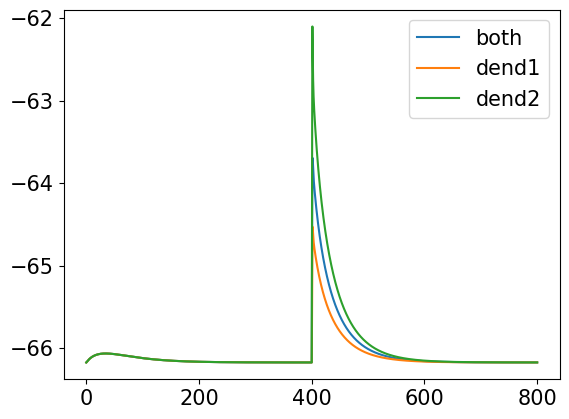

In [38]:
plt.plot(t, v2, label='both')
plt.plot(t, v3, label='dend1')
plt.plot(t, v1, label='dend2')
plt.legend()

Text(0, 0.5, 'V (mV)')

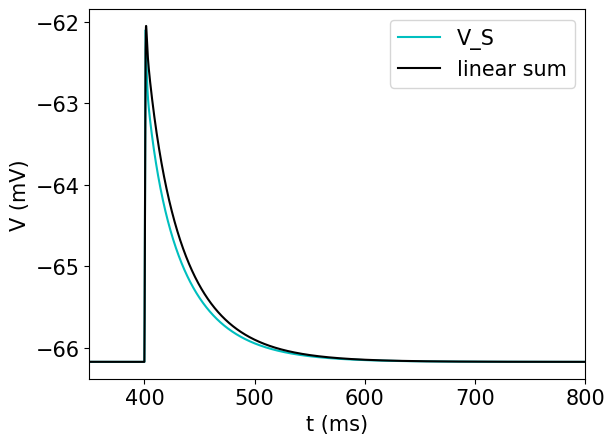

In [23]:
plt.plot(t, v1, c='c', label='V_S')
plt.plot(t, v2+v3+66.175, c='black', ls='-', label='linear sum')
plt.legend()
plt.xlim(350, 800)
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
# plt.savefig('figure/current_based_input.png', dpi=800, bbox_inches='tight')